<h1 style="color:purple;">Predicting if a Customer Subscribes for Fixed Term Deposit - Bank Telemarketing</h1>

### Project by Siddarth Karuka

Data Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
sns.set()

In [2]:
data = pd.read_csv('./bank-additional/bank-additional-full.csv',delimiter=';')

<h2 style="color:purple;">Input variables:</h2>

<h3 style="color:purple;">Bank client data:</h3>

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

<h3 style="color:purple;">Related with the last contact of the current campaign:</h3>

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<h3 style="color:purple;">Other attributes:</h3>

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<h3 style="color:purple;">Social and economic context attributes:</h3>

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <a href="https://www.euribor-rates.eu/">More info here</a>

20 - nr.employed: number of employees - quarterly indicator (numeric)

<h2 style="color:purple;">Output variable (desired target):</h2>

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

---

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

---

No NANs or empty fields

But we can see fields with "unknown" values, which I would like to remove from my data

---

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
objects_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week',
               'poutcome','y']

In [8]:
mask = np.column_stack([data[col].str.contains(r"unknown", na=False) for col in objects_list])
unknown_data=data.loc[mask.any(axis=1)]
unknown_data.shape

(10700, 21)

---

It looks like 10700 out of 41188 rows have some column with an unknown value. 

It's better to remove all those rows as to not affect my data analysis

---

In [9]:
clean_data = data
clean_data=clean_data.drop(unknown_data.index)
clean_data.shape

(30488, 21)

---

check that clean_data no longer has any rows with "unknown" values:

---

In [10]:
new_mask = np.column_stack([clean_data[col].str.contains(r"unknown", na=False) for col in objects_list])
clean_data.loc[new_mask.any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


---

<h2 style="color:purple;">Explore bank client data</h2>


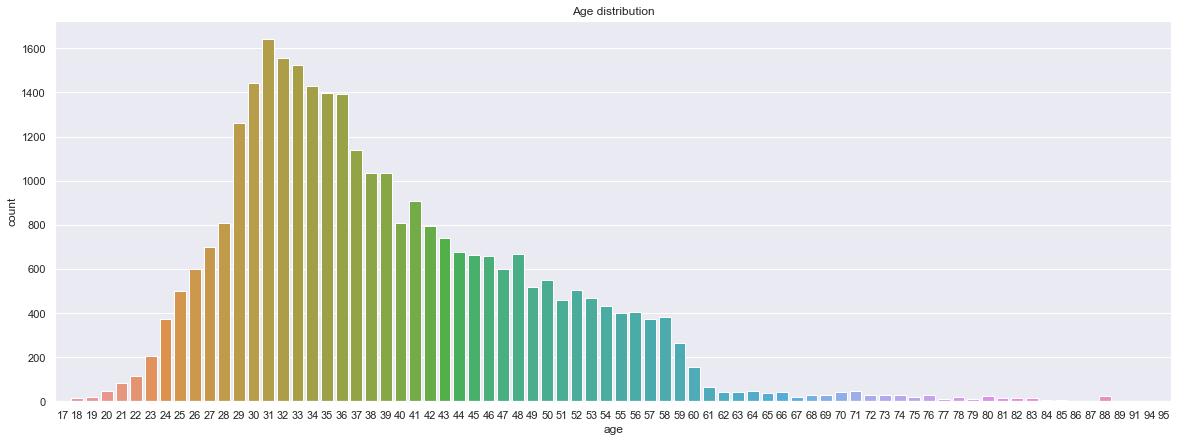

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(clean_data.age)
plt.title('Age distribution');

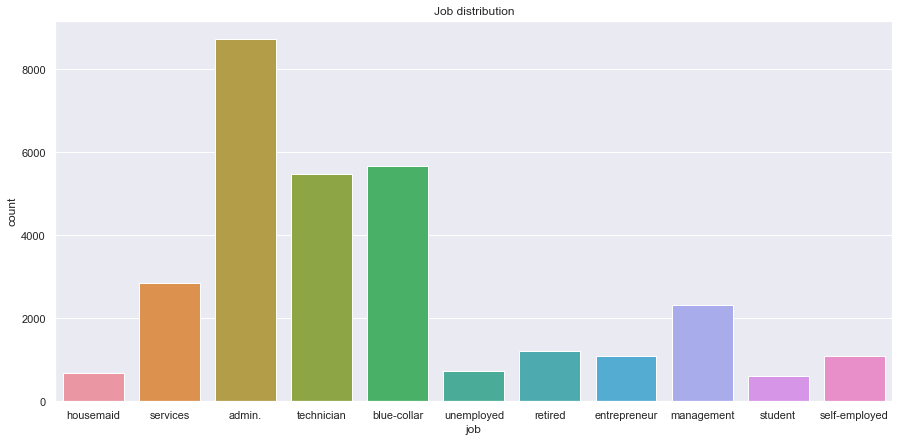

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(clean_data.job)
plt.title('Job distribution');

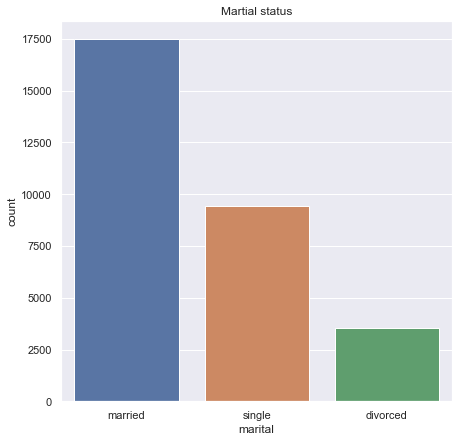

In [13]:
plt.figure(figsize=(7,7))
sns.countplot(clean_data.marital)
plt.title('Martial status');

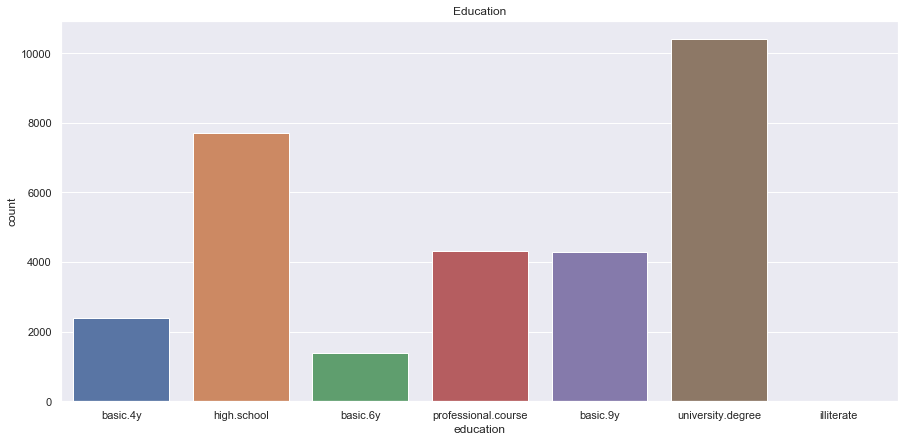

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(clean_data.education)
plt.title('Education');

In [11]:
clean_data.education.value_counts()

university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

In [12]:
# check to see if there's a non-zero number in illiterate column as the bar isn't visually identifiable
clean_data.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

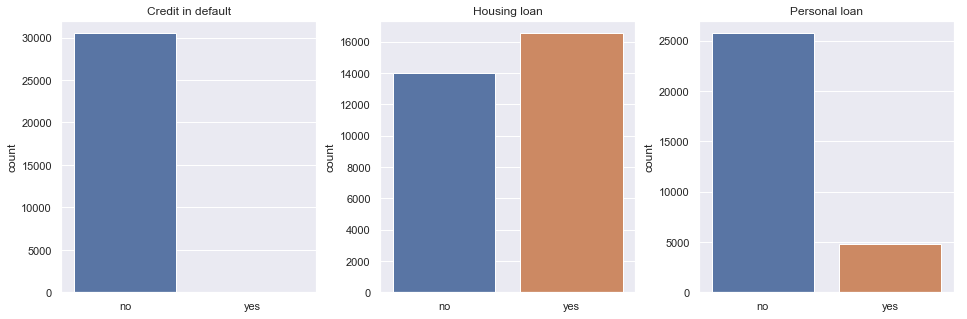

In [16]:
fig,ax = plt.subplots(1,3,figsize=(16, 5))
sns.countplot(clean_data.default,ax=ax[0])
sns.countplot(clean_data.housing,ax=ax[1])
sns.countplot(clean_data.loan,ax=ax[2])
ax[0].set(title='Credit in default',xlabel='')
ax[1].set(title='Housing loan',xlabel='')
ax[2].set(title='Personal loan',xlabel='')
plt.subplots_adjust(wspace=0.25);

---

<h2 style="color:purple;">Non-predictive variable</h2>

Call duration isn't really a predictive variable as one wouldn't know the value of this variable before making a telemarketing call, and one would the result after making the call. So we need to drop this from our list of variables that we use to build a predictive model. But first let's take a look at the distribution

/Users/Siddarth/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


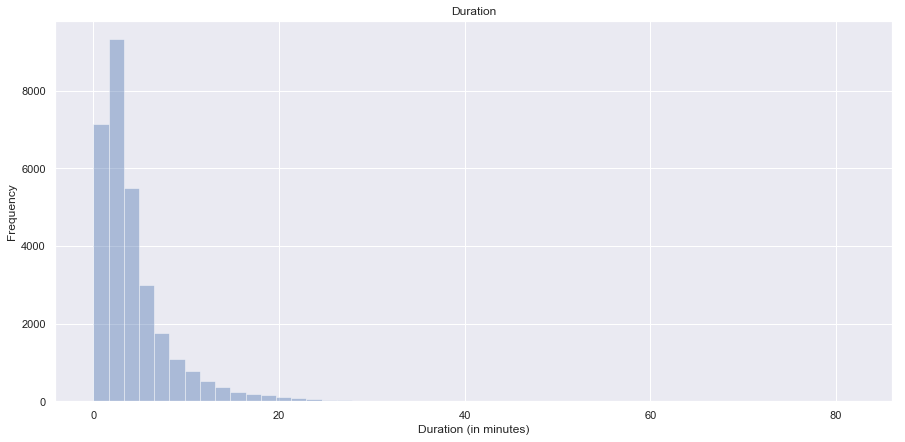

In [17]:
plt.figure(figsize=(15,7))
ax=sns.distplot(clean_data['duration']/60, kde=False)
plt.title('Duration')
ax.set(ylabel='Frequency',xlabel='Duration (in minutes)');

In [18]:
clean_data.duration.describe()

count    30488.000000
mean       259.484092
std        261.714262
min          0.000000
25%        103.000000
50%        181.000000
75%        321.000000
max       4918.000000
Name: duration, dtype: float64

In [19]:
print((clean_data.duration == 0).value_counts())
clean_data[clean_data.duration == 0]

False    30484
True         4
Name: duration, dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


Maximum call duration is 81.96 minutes, with the average being 4.32 minutes.

Also, it appears that there are 4 calls with 0 seconds duration. Not sure how this can be taken into account. Let's drop these rows, and the duration column entirely

In [20]:
clean_data=clean_data.drop(columns=['duration'])

---

<h2 style="color:purple;">Convert categorical to numerical</h2>

In the next step I would like to convert all categorical values to numerical values. There are a few ways to do this that I know of:
* LabelEncoder from sklearn
* OneHotEncoder from sklearn
* get_dummies from pandas

Using LabelEncoder can introduce unwanted patterns for machine learning purposes. OneHotEncoder and get_dummies are similar from my understanding, but the difference would be in what they convert. OneHotEncoder can't process strings, so one has to go through both LabelEncoder followed by OneHotEncoder. 

I'll use get_dummies

---

In [21]:
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
# Exclude target variable
numerical_clean_data = pd.get_dummies(clean_data.loc[:,clean_data.columns!='y'])

In [23]:
# join target variable 
numerical_clean_data['y']=clean_data.loc[:,'y']

---

I'll use LabelEncoder to the target variable (Yes = 1, No = 0), as using get_dummies creates two columns with redundant information (basically the two columns will complement each other), and we can use either of these to predict the sucess of a telemarketing call

---

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
numerical_clean_data['y'] = le.fit_transform(numerical_clean_data['y'])

In [25]:
numerical_clean_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
6,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0


In [26]:
numerical_clean_data.pdays.value_counts()

999    29178
3        381
6        363
4        102
2         53
9         53
12        50
7         50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
19         3
22         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

---

<h2 style="color:purple;">Scaling of factors</h2>

The factors that we use for predicting the outcome have different ranges of possible values. It would be better if we scale them so that one particular varibale doesn't dominate due to the range of numerical values it has.

There are two types of scalers available in sklearn
* StandardScaler
* RobustScaler

StandardScaler used the mean and standard deviation, where as RobustScaler uses Median and Quartiles. RobustScaler can deal with outliers more effectively than the StandardScaler

---

Scaling should be performed after splitting the data into train and test sets, as test set would include data that the model shouldn't have seen before (and including this in scaling would affect the scaling criteria)

---

In [27]:
X = numerical_clean_data.loc[:,numerical_clean_data.columns!='y']
y = numerical_clean_data.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7);

In [28]:
from sklearn.preprocessing import StandardScaler,RobustScaler
rb_sc = RobustScaler()
st_sc = StandardScaler()
X_train  = rb_sc.fit_transform(X_train[X_train.columns])
X_test = rb_sc.transform(X_test[X_test.columns]);
# Notice the use of same scaling for test data set (using transform instead of fit_transform)

In [29]:
X_train

array([[-1.42857143e-01, -5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.42857143e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.14285714e-02,  5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -5.00000000e-01,  0.00000000e+00, ...,
         1.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 1.28571429e+00, -5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35714286e+00,  0.00000000e+00, -9.90000000e+02, ...,
         1.00000000e+00, -1.00000000e+00,  0.00000000e+00]])

---

Before we train a model, let us check how the target variable is distributed. More specifically, we want to see if the data set is a balanaced one, i.e., if the success and failure occur at approximately the same scale.

---


In [30]:
numerical_clean_data['y'].value_counts()

0    26629
1     3859
Name: y, dtype: int64

---

It appears that the data is imbalanced, having only a few successful telemarketing calls compared to the failures. We will need to balance the training set so that the model doesn't get skewed. (Note: We only balance the training set, as balancing the entire dataset doesn't represent the real data set, and our model would perform poorly upon testing)

---

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [32]:
print('Training data before Over Sampling: \n',y_train.value_counts())

Training data before Over Sampling: 
 0    20006
1     2860
Name: y, dtype: int64


In [33]:
unique, counts = np.unique(y_train_sm, return_counts=True)
print('Training data after Over Sampling: \n',unique, counts)

Training data after Over Sampling: 
 [0 1] [20006 20006]


In [34]:
y_test.value_counts()

0    6623
1     999
Name: y, dtype: int64

---

<h2 style="color:purple;">Logistic Regression</h2>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression (aka logit, MaxEnt) classifier</a>.



In [35]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(fit_intercept=False,solver='liblinear') 
model_log.fit(X_train_sm,y_train_sm)
model_log_pred = model_log.predict(X_test)

In [36]:
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = model_log_pred))
print('precision score: ',precision_score(y_true = y_test, y_pred = model_log_pred))
conf_m_log = confusion_matrix(y_test,model_log_pred)
print('confusion matrix: \n',conf_m_log)

accuracy score:  0.8089740225662556
precision score:  0.3731260410882843
confusion matrix: 
 [[5494 1129]
 [ 327  672]]


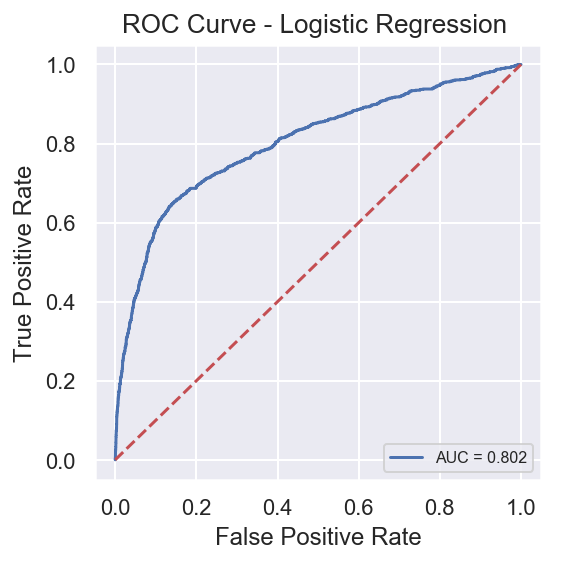

In [37]:
figure(figsize=(4, 4),dpi=144)
from sklearn import metrics
prob_log = model_log.predict_proba(X_test)
pred_log = prob_log[:,1]
fpr_log, tpr_log, threshold_log = roc_curve(y_test, pred_log)
roc_auc_log = metrics.auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC = %0.3f' % roc_auc_log)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve - Logistic Regression ',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 8});

---

<h2 style="color:purple;">k-neighbors classifier</h2>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">Classifier implementing the k-nearest neighbors vote</a>.


In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=25)
model_knn.fit(X_train, y_train)
model_knn_pred = model_knn.predict(X_test)

In [39]:
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = model_knn_pred))
print('precision score: ',precision_score(y_true = y_test, y_pred = model_knn_pred))
conf_m_knn = confusion_matrix(y_test,model_knn_pred)
print('confusion matrix: \n',conf_m_knn)

accuracy score:  0.8865127263185516
precision score:  0.6610576923076923
confusion matrix: 
 [[6482  141]
 [ 724  275]]


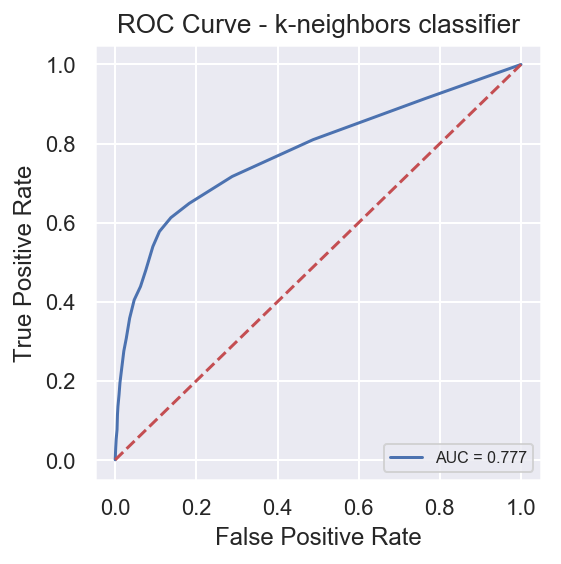

In [40]:
figure(figsize=(4, 4),dpi=144)
prob_knn = model_knn.predict_proba(X_test)
pred_knn = prob_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, pred_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.3f' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve - k-neighbors classifier',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 8});

---

<h2 style="color:purple;">Random Forest</h2>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">A random forest classifier</a>.


In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators = 100)
model_rfc.fit(X_train, y_train)
model_rfc_pred = model_rfc.predict(X_test)

In [42]:
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = model_rfc_pred))
print('precision score: ',precision_score(y_true = y_test, y_pred = model_rfc_pred))
conf_m_rfc = confusion_matrix(y_test,model_rfc_pred)
print('confusion matrix: \n',conf_m_rfc)

accuracy score:  0.8785095775387037
precision score:  0.564373897707231
confusion matrix: 
 [[6376  247]
 [ 679  320]]


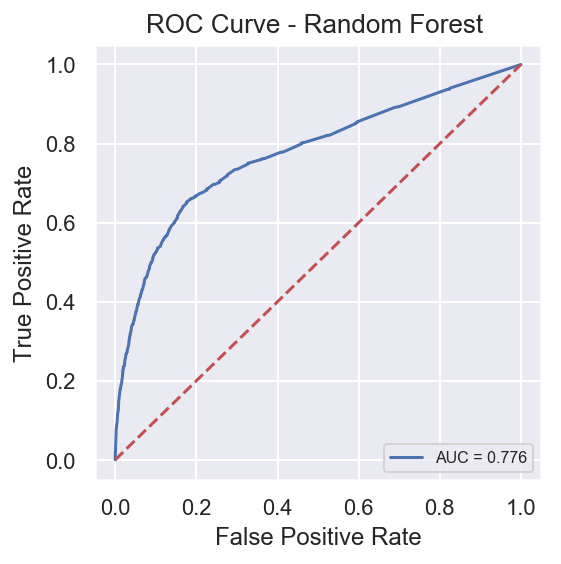

In [43]:
figure(figsize=(4, 4),dpi=144)
prob_rfc = model_rfc.predict_proba(X_test)
pred_rfc = prob_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, pred_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, 'b', label = 'AUC = %0.3f' % roc_auc_rfc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve - Random Forest ',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 8});

---

<h2 style="color:purple;">Decision Tree</h2>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">A decision tree classifier</a>.

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(criterion='gini')
model_dtree.fit(X_train, y_train)
model_dtree_pred = model_dtree.predict(X_test)

In [45]:
print('accuracy score: ',accuracy_score(y_true = y_test, y_pred = model_dtree_pred))
print('precision score: ',precision_score(y_true = y_test, y_pred = model_dtree_pred))
conf_m_dtree = confusion_matrix(y_test,model_dtree_pred)
print('confusion matrix: \n',conf_m_dtree)

accuracy score:  0.8293098924166885
precision score:  0.35424710424710426
confusion matrix: 
 [[5954  669]
 [ 632  367]]


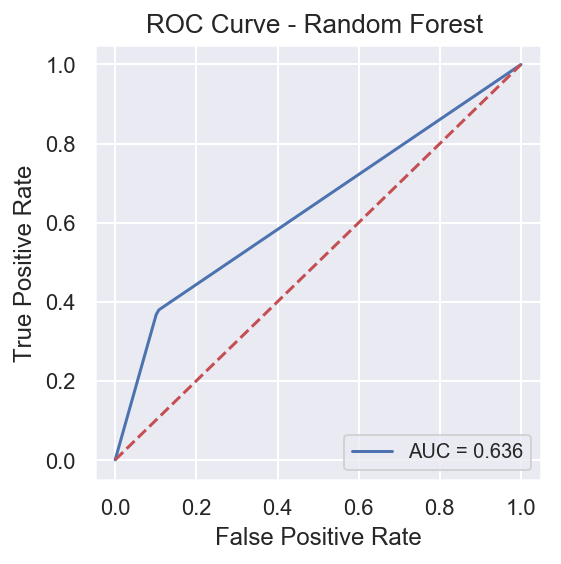

In [46]:
figure(figsize=(4, 4),dpi=144)
prob_dtree = model_dtree.predict_proba(X_test)
pred_dtree = prob_dtree[:,1]
fpr_dtree, tpr_dtree, threshold_dtree = roc_curve(y_test, pred_dtree)
roc_auc_dtree = metrics.auc(fpr_dtree, tpr_dtree)
plt.plot(fpr_dtree, tpr_dtree, 'b', label = 'AUC = %0.3f' % roc_auc_dtree)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve - Random Forest ',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 10});

---

<h2 style="color:purple;">So what model to use?</h2>

Let's see how they compare in terms of ROC and AUC-ROC score

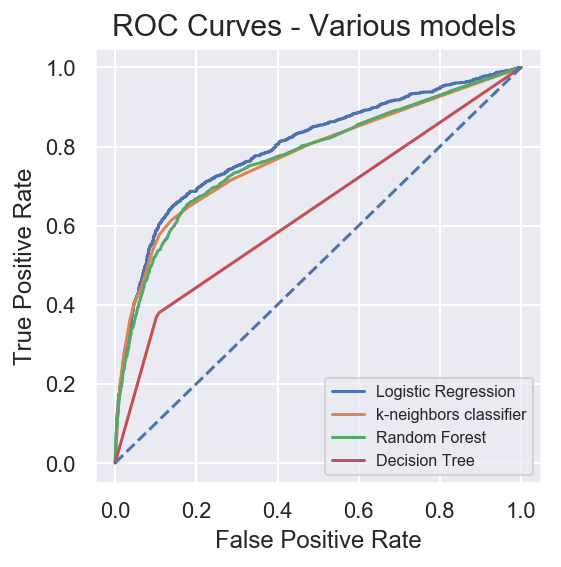

In [47]:
figure(figsize=(4, 4),dpi=144)
plt.plot(fpr_log, tpr_log, label = 'Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label = 'k-neighbors classifier')
plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest')
plt.plot(fpr_dtree, tpr_dtree, label = 'Decision Tree')
plt.plot([0, 1], [0, 1],'b--')
plt.title('ROC Curves - Various models ',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 8});

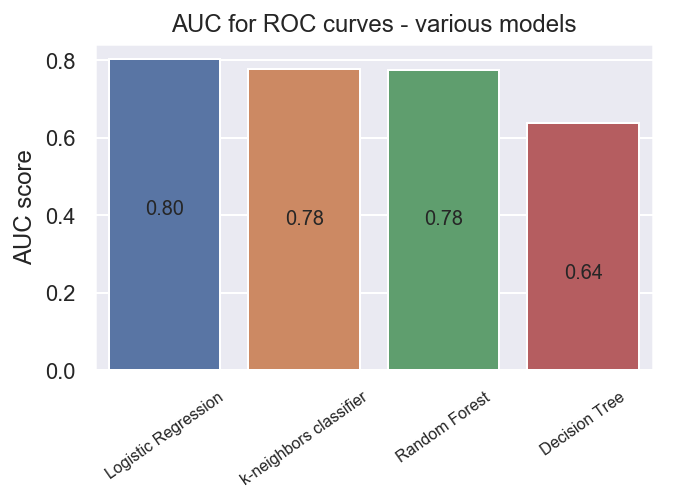

In [48]:
figure(figsize=(5, 3),dpi=144)
x=['Logistic Regression','k-neighbors classifier','Random Forest','Decision Tree']
y=[roc_auc_log,roc_auc_knn,roc_auc_rfc,roc_auc_dtree]
g=sns.barplot(x,y)
g.set_xticklabels(g.get_xticklabels(), rotation=35,fontsize=8)
g.set_ylabel('AUC score')
g.set_title('AUC for ROC curves - various models')
for p in g.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height-0.4,
            '{:1.2f}'.format(height),
            ha="center") 

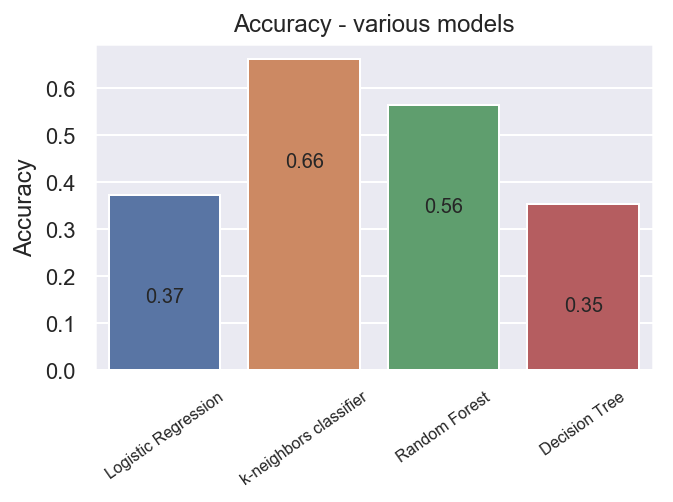

In [49]:
figure(figsize=(5, 3),dpi=144)
x=['Logistic Regression','k-neighbors classifier','Random Forest','Decision Tree']
y=[precision_score(y_true = y_test, y_pred = model_log_pred),\
  precision_score(y_true = y_test, y_pred = model_knn_pred),\
  precision_score(y_true = y_test, y_pred = model_rfc_pred),\
  precision_score(y_true = y_test, y_pred = model_dtree_pred)]
g=sns.barplot(x,y)
g.set_xticklabels(g.get_xticklabels(), rotation=35,fontsize=8)
g.set_ylabel('Accuracy')
g.set_title('Accuracy - various models')
for p in g.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height-0.23,
            '{:1.2f}'.format(height),
            ha="center") 

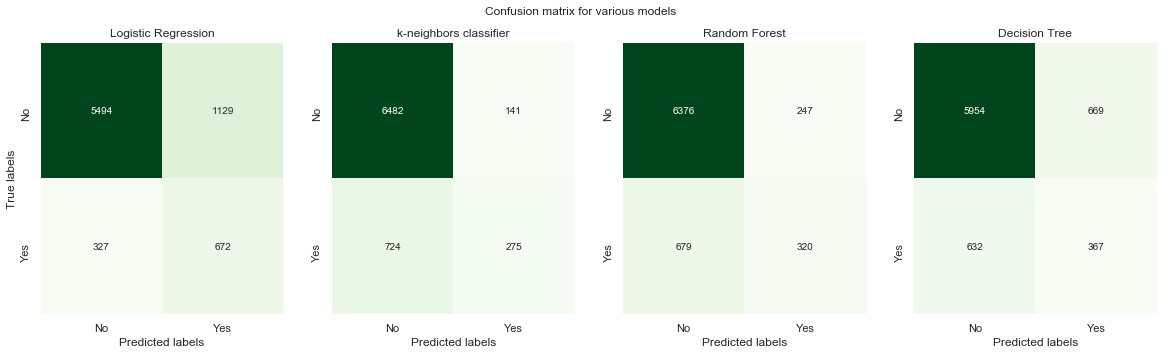

In [50]:
fig,ax = plt.subplots(1,4,figsize=(20, 5))
sns.heatmap(conf_m_log, annot=True,cmap='Greens',fmt='g',ax=ax[0],cbar=False); #annot=True to annotate cells
ax[0].set_xlabel('Predicted labels');ax[0].set_ylabel('True labels'); 
ax[0].set_title('Logistic Regression'); 
ax[0].xaxis.set_ticklabels(['No', 'Yes']); ax[0].yaxis.set_ticklabels(['No', 'Yes'])
sns.heatmap(conf_m_knn, annot=True,cmap='Greens',fmt='g',ax=ax[1],cbar=False);
ax[1].set_xlabel('Predicted labels')
ax[1].set_title('k-neighbors classifier'); 
ax[1].xaxis.set_ticklabels(['No', 'Yes']); ax[1].yaxis.set_ticklabels(['No', 'Yes'])
sns.heatmap(conf_m_rfc, annot=True,cmap='Greens',fmt='g',ax=ax[2],cbar=False); 
ax[2].set_xlabel('Predicted labels')
ax[2].set_title('Random Forest'); 
ax[2].xaxis.set_ticklabels(['No', 'Yes']); ax[2].yaxis.set_ticklabels(['No', 'Yes'])
sns.heatmap(conf_m_dtree, annot=True,cmap='Greens',fmt='g',ax=ax[3],cbar=False);
ax[3].set_xlabel('Predicted labels')
ax[3].set_title('Decision Tree'); 
ax[3].xaxis.set_ticklabels(['No', 'Yes']); ax[3].yaxis.set_ticklabels(['No', 'Yes'])
fig.suptitle('Confusion matrix for various models');

---

<h1 style="color:purple;">Taking a closer look at the outcomes of various models</h1>

The AUC-ROC scores are very close for Logistic Regression, k-nearest classifier and Random Forest. Decision Tree model doesn't stand in the same class as other models.

However, if we look at the accuracy scores, k-neighbours classifier has the highest accuracy, which means that if we make calls based on this model's prediction, most of those calls would be a success (compared to other models).

But, if we look at the confusion matrix, there's a difference in how these models make mistakes. k-neighbours classifier has most accuracy, but only captured 275 out of 999 successful customers. Logistic Regression on the other hand captured 672 out of 999 successful customers, but at the expense of making more calls.

Let me explain what's going on:

A model can predict "No" when the true label is actually "Yes", known as "False Negatives". That means the model predicted that the customer wouldn't subscribe, but based on the data, the customer actually did subscribe. So if we used this model prediction outcome, we wouldn't make a call and thus would lose a potential customer. 

Based on the four prediction models that we used, we have two possible options. 
* Use k-neighbours classification, make fewer calls but with greater accuracy
* Use Logistic Regression, gain more customers but with less accuracy than k-neighbours classification (still greater than not using a model)


---

<h1 style="color:purple;">Let's compare numbers</h1>

Let's consider our test scenario to see how much it actually helps to implement this prediction model.

In our test scenario, there are 7622 calls made to potential customers. After making these calls by spending 549 hours (taking an average of 4.32 minutes per call), 999 of them subscribed to the term deposit (13.1% success). 

If we use our Logistic Regression model, we would make 1801 calls, out of which 672 would be a success (37.3% success). This would be approximately a three fold increase in success, while losing 327 customers (32% loss in customers) and saving 419 hours of time (76% reduction in time spent calling)

If we use the k-neighbours classifier model, we would make 416 calls, out of which 275 would be a success (66.1% success). This would be approximately a five fold increase in success, while losing 724 customers (72% loss in customers) and saving 518 hours of time (94% reduction in time spent calling)

---

<h1 style="color:purple;">Conclusion</h1>

So what model to use? 

Well, that depends on various other factors. We need a lot more information to make this decision.
* Is the business trying to expand? 
* What's the long term benefit from gaining a customer? 
* Is it trying to save money? 
* Does it cost more in telemarketing for 100 hours than it costs more in gaining 397 customers? 
* Would the business be more interested in not making unwanted telemarketing calls to save it's image?

An appropriate response for the first two questions might require a Logistic Regression model, where as a focus on saving money/time/image based on the answers to the last three questions would require a k-neighbours classifier model